In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import math
import os

from moviepy.editor import VideoFileClip
from IPython.display import HTML

%matplotlib inline

This image is: <class 'numpy.ndarray'> with dimensions: (540, 960, 3)


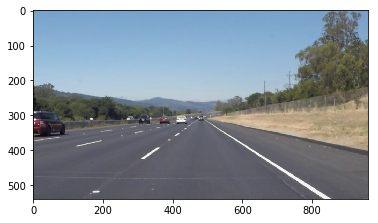

In [8]:
img = mpimg.imread('test_images/solidWhiteRight.jpg')

print('This image is:', type(img), 'with dimensions:', img.shape)
plt.imshow(img)

In [9]:
# Nessesary variables

kernel_size = 7         # Size of the n x n matrix used as kernel in gaussian blur

α = 0.9                 # Weight factor for initial image
β = 0.4                 # Weight factor for new image
λ = 0.22                # Scalar added to each sum (of new and initial image), see weighted_img function

low_threshold = 50      # Value for the canny function, defining the first threshold
high_threshold = 150    # Value for the canny function, defining the second threshold

rho = 1                 # Distance resolution in pixels of the Hough grid
theta = np.pi/90        # Angular resolution in radians of the Hough grid
threshold = 15          # Minimum number of votes (intersections in Hough grid cell)

min_line_length = 70    # Minimum number of pixels in a line
max_line_gap = 180      # Maximum gap in pixels between connectable line segments

H = img.shape[0]        # Getting the hight of the image
W = img.shape[1]        # Getting the width of the image

vertices = np.array([(x * W, y * H) for (x,y) in [[0.05,1], [0.46, 0.60], [0.54, 0.60], [1,1]]], np.int32) # ROI

In [10]:
def grayscale(img):
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
def canny(img, low_threshold, high_threshold):
    return cv2.Canny(img, low_threshold, high_threshold)

def gaussian_blur(img, kernel_size):
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

def region_of_interest(img, vertices):
    mask = np.zeros_like(img)   
    
    if len(img.shape) > 2:
        channel_count = img.shape[2]  # i.e. 3 or 4 depending on your image
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
        
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image


def draw_lines(img, lines, color=[255, 0, 0], thickness=2):
    for line in lines:
        for x1,y1,x2,y2 in line:
            cv2.line(img, (x1, y1), (x2, y2), color, thickness)

def hough_lines(img, rho, theta, threshold, min_line_len, max_line_gap):
    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)
    line_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    draw_lines(line_img, lines)
    return line_img

def weighted_img(img, initial_img, α=0.8, β=1.0, γ=0.0):
    return cv2.addWeighted(initial_img, α, img, β, γ)

In [11]:
def process_image(img):
    gray_img = grayscale(img)
    blur_img = gaussian_blur(gray_img, kernel_size)
    edge_img = canny(blur_img, low_threshold, high_threshold)
    maskd_img = region_of_interest(edge_img, [vertices])
    lane_img = hough_lines(maskd_img, rho, theta, threshold, min_line_length, max_line_gap)
    final_img = weighted_img(lane_img, img, α, β, λ)
    
    return final_img

## Process image

Image solidWhiteCurve.jpg displayed below is: <class 'numpy.ndarray'> with dimensions: (540, 960, 3)


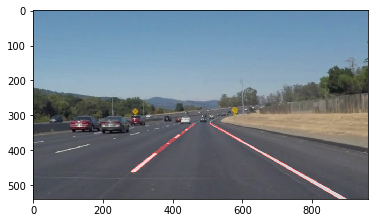

Image whiteCarLaneSwitch.jpg displayed below is: <class 'numpy.ndarray'> with dimensions: (540, 960, 3)


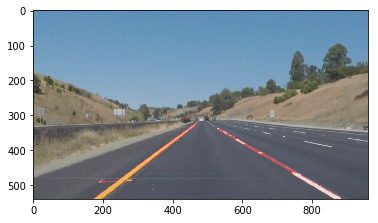

Image solidWhiteRight.jpg displayed below is: <class 'numpy.ndarray'> with dimensions: (540, 960, 3)


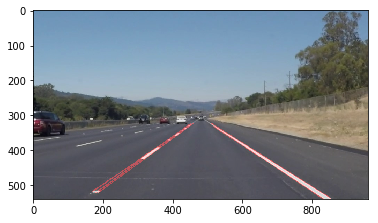

Image solidYellowCurve.jpg displayed below is: <class 'numpy.ndarray'> with dimensions: (540, 960, 3)


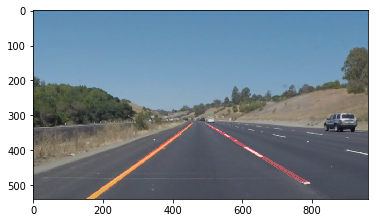

Image solidYellowCurve2.jpg displayed below is: <class 'numpy.ndarray'> with dimensions: (540, 960, 3)


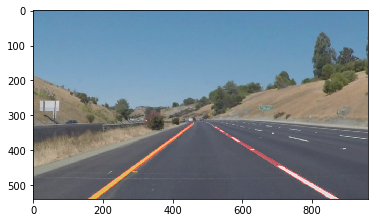

Image solidYellowLeft.jpg displayed below is: <class 'numpy.ndarray'> with dimensions: (540, 960, 3)


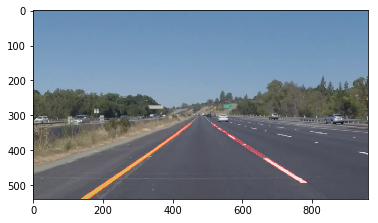

In [12]:
for image_file in os.listdir("test_images/"):
    img = mpimg.imread("test_images/" + image_file)
    processed_img = process_image(img)
    
    # save pic
    mpimg.imsave('test_images_output/Processed_'+ image_file, processed_img)
    
    print('Image ' + image_file +' displayed below is:', type(img), 'with dimensions:', img.shape)
    plt.imshow(processed_img)
    plt.show()

## Process video 

In [13]:
white_output = 'test_videos_output/solidWhiteRight2.mp4'
clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4")
white_clip = clip1.fl_image(process_image)
white_clip.write_videofile(white_output, audio=False)

[MoviePy] >>>> Building video test_videos_output/solidWhiteRight2.mp4
[MoviePy] Writing video test_videos_output/solidWhiteRight2.mp4


100%|█████████▉| 221/222 [00:12<00:00, 15.71it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: test_videos_output/solidWhiteRight2.mp4 



In [14]:
yellow_output = 'test_videos_output/solidYellowLeft2.mp4'
clip2 = VideoFileClip('test_videos/solidYellowLeft.mp4')
yellow_clip = clip2.fl_image(process_image)
%time yellow_clip.write_videofile(yellow_output, audio=False)

[MoviePy] >>>> Building video test_videos_output/solidYellowLeft2.mp4
[MoviePy] Writing video test_videos_output/solidYellowLeft2.mp4


100%|█████████▉| 681/682 [00:43<00:00, 15.45it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: test_videos_output/solidYellowLeft2.mp4 

CPU times: user 7.49 s, sys: 776 ms, total: 8.26 s
Wall time: 45.4 s


In [15]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(yellow_output))